# Questão 2.3. 
### Melhoria Iterativa. 
Usando um algoritmo distinto dos utilizados nos itens anteriores,
determine o máximo global da função abaixo. (Resoluções analíticas não são
aceitáveis). Você encontrou algum ponto de máximo local ? Qual(is)?

In [1]:
# imports necessários
import math
import matplotlib.pyplot as plt
import numpy as np
import random 

E = math.e # número de Euler

Função a ser analisada:

$f(x,y) = 4e^{-(x^2 + y^2 - 2(x+y-1))} + e^{-((x-3)^2 + (y-3)^2)} + e^{-((x+3)^2 + (y-3)^2)} + e^{-((x-3)^2 + (y+3)^2)} + e^{-((x+3)^2 + (y+3)^2)}$

In [2]:
# Implementando a função
def f(x,y):
    return 4*E**(-(x**2 + y**2 - 2*(x+y-1)) ) + E**(-((x-3)**2+(y-3)**2)) + E**(-((x+3)**2+(y-3)**2)) + E**(-((x-3)**2+(y+3)**2)) + E**(-((x+3)**2+(y+3)**2))

Observação gráfica inicial:

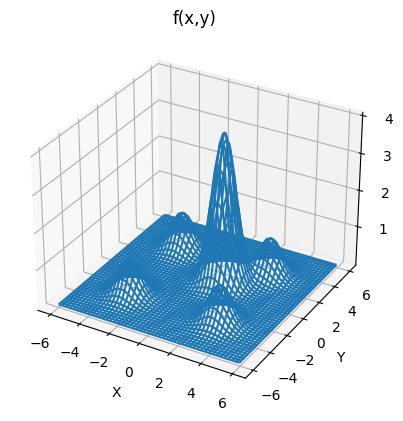

In [3]:
x = np.arange(-6,6,0.05)
y = np.arange(-6,6,0.05)
x,y = np.meshgrid(x,y)
z = np.array(f(x,y))
fig = plt.figure()
axes = plt.axes(projection="3d")
splot = axes.plot_wireframe(x, y, z)
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("f(x,y)")
plt.show()

Implementando classe auxiliar "Point" com atributos $x$, $y$ e método de custo sendo $-f(x,y)$

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def cost(self):
        return -f(self.x, self.y)

### Algorítmo utilizado: Têmpera Simulada

In [5]:
# estado incial
currentP = Point(0,0)

# hiperparâmetros
Temp = 0.9
alpha = 0.5
errTemp = 10**(-10)
trials = 50

# funções auxiliares
def get_next_trial_point(P):
    Plist = []
    for dx in [-0.01, 0.01]:
        for dy in [-0.01, 0.01]:
            Plist.append(Point(P.x + dx, P.y + dy))
    return (random.choice(Plist), Plist)

def is_max_local(P, List):
    local = 1
    for Q in List:
        if Q.cost() <= P.cost():
            local = 0
    return local

# têmpera simulada
maxlocals = []
trackerList = [] 

while(Temp > errTemp):
    for trial in range(trials): 
        # rastreio dos pontos analisados
        if(currentP not in trackerList):
            trackerList.append(currentP)
        # comparativo com o ponto atual e verificação de máximo local
        trialP, compareList = get_next_trial_point(currentP)
        if(is_max_local(currentP, compareList) and currentP not in maxlocals):
            maxlocals.append(currentP)

        deltaCost = currentP.cost() - trialP.cost()
        # ganho em função objetivo
        if(deltaCost >= 0):
            currentP = trialP
        else:
            # escolha de perda em função objetivo com probabilidade exponencial decrescente 
            if(deltaCost/Temp > -100 and random.uniform(0,1) < E**(-deltaCost/Temp)):
                currentP = trialP
    # redução por fator alpha
    Temp = alpha*Temp

print("Solução encontrada:")
print("x: ", currentP.x, " y: ", currentP.y)

print("Máximos locais encontrados: ")
for P in maxlocals:
    print("x: ", P.x, " y: ", P.y)


Solução encontrada:
x:  1.0000000000000007  y:  1.0000000000000007
Máximos locais encontrados: 
x:  1.0000000000000007  y:  1.0000000000000007


Observação gráfica final:

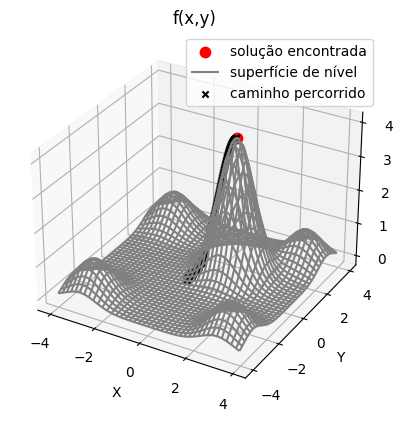

In [6]:
x = np.arange(-4,4,0.05)
y = np.arange(-4,4,0.05)
x,y = np.meshgrid(x,y)
z = np.array(f(x,y))
fig = plt.figure()
axes = plt.axes(projection="3d")

# representando solução:
zsol = f(currentP.x, currentP.y)
axes.scatter(currentP.x, currentP.y, zsol, color="red", linewidths= 4, label="solução encontrada")

# superfície de nível
axes.plot_wireframe(x, y, z, label = "superfície de nível", color="gray")

# representando rastreio:
xtracker = []
ytracker = []
ztracker = []
for T in trackerList:
    xtracker.append(T.x)
    ytracker.append(T.y)
    ztracker.append(-T.cost())
axes.scatter(xtracker, ytracker, ztracker, color="black", marker= "x", label = "caminho percorrido")

axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("f(x,y)")
axes.legend()
plt.show()